<a href="https://colab.research.google.com/github/IT24100400/2025-Y2-S1-MLB-B3G2-10---Weather-related-disease-prediction---Data-Preprocessing-and-EDA-Pipeline/blob/main/Group_Pipeline/Group_Pipeline_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
import joblib
from google.colab import files
import os
from sklearn.impute import SimpleImputer


sns.set(color_codes=True)
pd.set_option("display.max_columns", None)

In [20]:
print (os.getcwd())

/content


In [21]:
uploaded = files.upload()

Saving Weather-related disease prediction.csv to Weather-related disease prediction (1).csv


In [22]:
raw_file = "Weather-related disease prediction.csv"
df = pd.read_csv(raw_file)
print("Raw shape:", df.shape)

Raw shape: (5200, 51)


In [23]:
df.head() # Display the first 5 rows of the data

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,chest_pain,vomiting,cough,shivering,asthma_history,high_cholesterol,diabetes,obesity,hiv_aids,nasal_polyps,asthma,high_blood_pressure,severe_headache,weakness,trouble_seeing,fever,body_aches,sore_throat,sneezing,diarrhea,rapid_breathing,rapid_heart_rate,pain_behind_eyes,swollen_glands,rashes,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,Sinusitis


In [24]:
df.dtypes  # Check for the Types of the Data in the Dataset

,0
Age,int64
Gender,int64
Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
nausea,int64
joint_pain,int64
abdominal_pain,int64
high_fever,int64
chills,int64


In [25]:
df.info()  # Display the summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [26]:
df.describe() #  Display the Descriptive Statistical Features of the DataFrame

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,chest_pain,vomiting,cough,shivering,asthma_history,high_cholesterol,diabetes,obesity,hiv_aids,nasal_polyps,asthma,high_blood_pressure,severe_headache,weakness,trouble_seeing,fever,body_aches,sore_throat,sneezing,diarrhea,rapid_breathing,rapid_heart_rate,pain_behind_eyes,swollen_glands,rashes,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.00000,5200.0,5200.0,5200.0,5200.0,5200.0,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,0.121923,0.097115,0.101538,0.129808,0.241731,0.169231,0.209231,0.06000,0.0,0.0,0.0,0.0,0.0,0.263462,0.027500,0.064038,0.139615,0.094808,0.036538,0.039038,0.031538,0.034038,0.063654,0.035577,0.039615,0.007500,0.035385,0.005769,0.034231,0.064038,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,0.327228,0.296143,0.302069,0.336124,0.428173,0.374992,0.406799,0.23751,0.0,0.0,0.0,0.0,0.0,0.440553,0.163551,0.244845,0.346621,0.292977,0.187644,0.193705,0.174785,0.181345,0.244159,0.185251,0.195073,0.086285,0.184768,0.075743,0.181839,0.244845,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.00000

In [27]:
#Find the duplicate rows
df.count
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (219, 51)


In [29]:
# Target engineering
def _norm_label(x): return str(x).strip().lower()
def _map_to_3class(x):
    s = _norm_label(x)
    if s in {"heart attack","heart-attack","heart_attack","heartattack"}:
        return "Heart Attack"
    if s in {"migraine","migrane","migraine headache","migraine-"}:
        return "Migraine"
    return "Other"

df["prognosis_3class"] = df["prognosis"].map(_map_to_3class)
print(df["prognosis_3class"].value_counts())

prognosis_3class
Other           3246
Heart Attack    1013
Migraine         941
Name: count, dtype: int64


Missing values per column before handling:
Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat                0


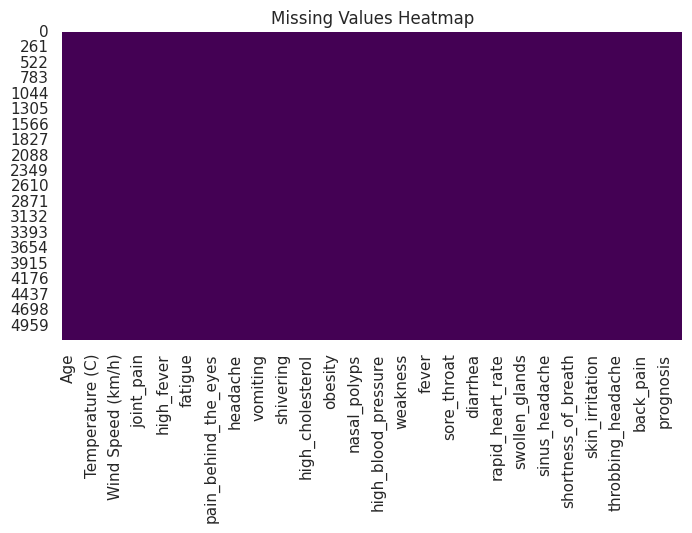

Missing values after imputation:
Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat                0
sneezing  

In [32]:
print("Missing values per column before handling:")
print(df.isnull().sum())

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns


num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


print("Missing values after imputation:")
print(df.isnull().sum())

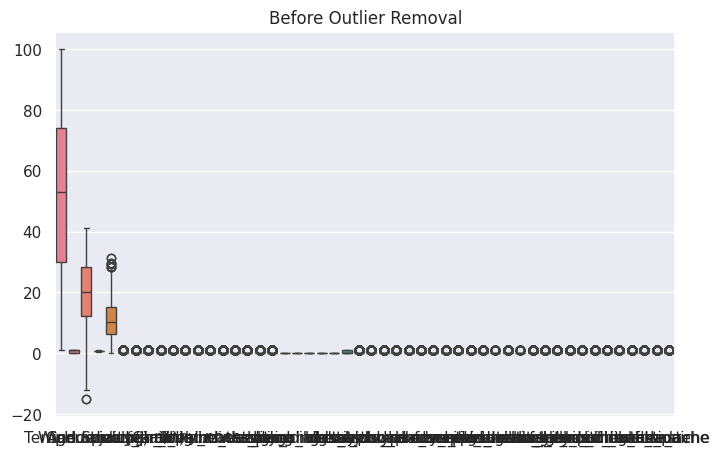

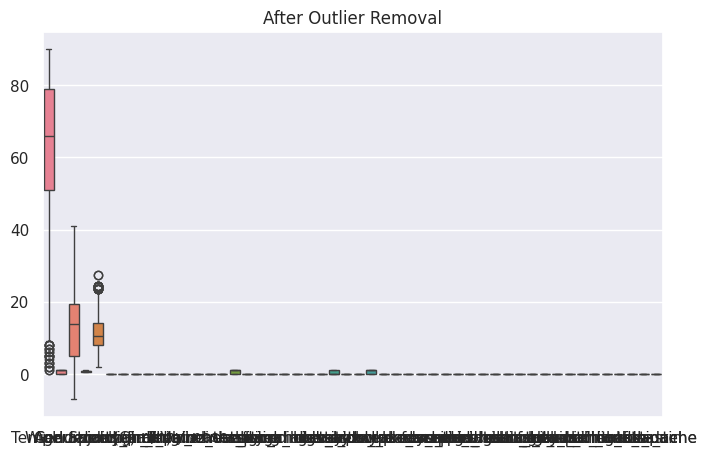

In [34]:
# Outlier Removal (IQR Method)
plt.figure(figsize=(8,5))
sns.boxplot(data=df[numeric_cols])
plt.title("Before Outlier Removal")
plt.show()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Boxplot after removal
plt.figure(figsize=(8,5))
sns.boxplot(data=df[numeric_cols])
plt.title("After Outlier Removal")
plt.show()

In [35]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

continuous_cols = ["Age","Temperature (C)","Humidity","Wind Speed (km/h)"]
clip_bounds = {"Age": (0,120),"Temperature (C)": (-30,55),
               "Humidity": (0,100),"Wind Speed (km/h)": (0,200)}

mask = np.ones(len(df), dtype=bool)
for col,(lo,hi) in clip_bounds.items():
    mask &= df[col].between(lo, hi)

df = df[mask].reset_index(drop=True)
print("After cleaning:", df.shape)

After cleaning: (701, 52)


Categorical Columns: ['prognosis', 'prognosis_3class']


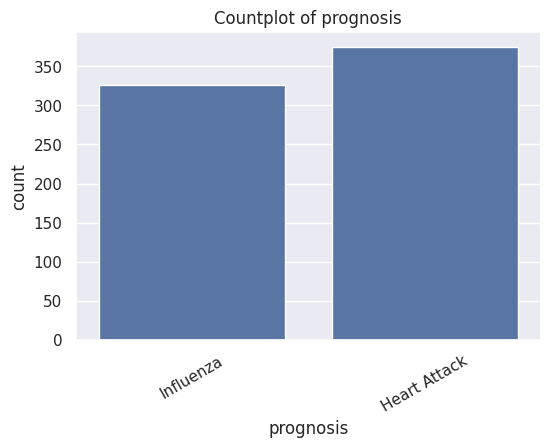

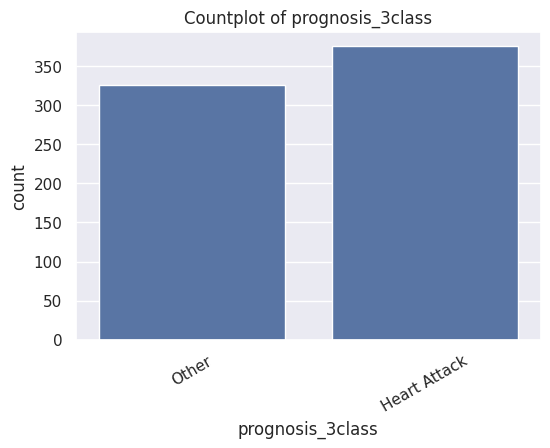

Encoding complete. Sample data:
    Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0  45.0     0.0        13.800000  0.817083           4.291992     0.0   
1  75.0     0.0         4.826620  0.850417          11.916013     0.0   
2  52.0     0.0        20.148611  0.649583           8.655762     0.0   
3  70.0     1.0         5.287963  0.947500           7.785692     0.0   
4  55.0     1.0        23.206481  0.681667          15.056854     0.0   

   joint_pain  abdominal_pain  high_fever  chills  fatigue  runny_nose  \
0         0.0             0.0         0.0     0.0      0.0         0.0   
1         0.0             0.0         0.0     0.0      0.0         0.0   
2         0.0             0.0         0.0     0.0      0.0         0.0   
3         0.0             0.0         0.0     0.0      0.0         0.0   
4         0.0             0.0         0.0     0.0      0.0         0.0   

   pain_behind_the_eyes  dizziness  headache  chest_pain  vomiting  cough  \
0      

In [37]:
# Encode target
print("Categorical Columns:", categorical_cols.tolist())

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)
    plt.show()



encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("Encoding complete. Sample data:")
print(df.head())

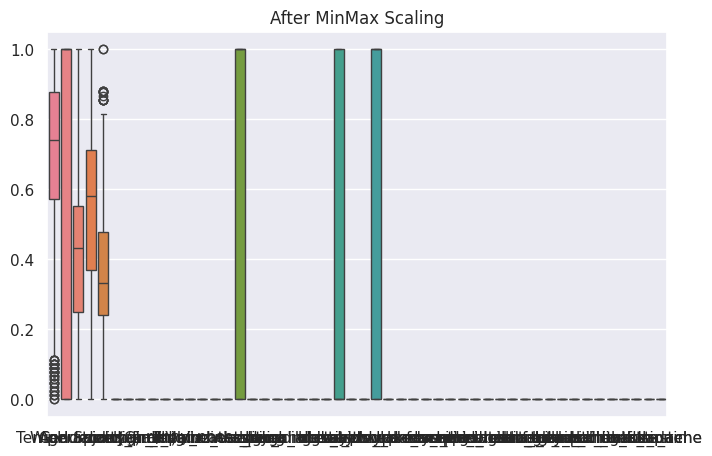

In [38]:
# Scaling continuous features
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


plt.figure(figsize=(8,5))
sns.boxplot(data=df[numeric_cols])
plt.title("After MinMax Scaling")
plt.show()

Selected features after variance threshold:
['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'chest_pain', 'hiv_aids', 'high_blood_pressure', 'prognosis']


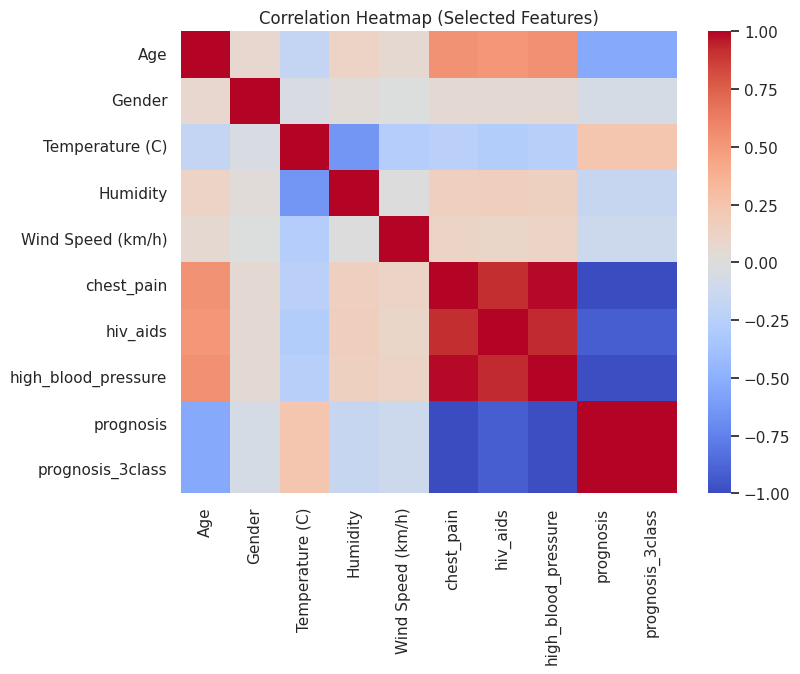

In [42]:
# Variance Threshold

TARGET = "prognosis_encoded" if "prognosis_encoded" in df.columns else df.columns[-1]

X = df.drop(columns=[TARGET])
y = df[TARGET]

# Apply variance threshold
var_selector = VarianceThreshold(threshold=0.01)
X_var = var_selector.fit_transform(X)
selected_features = X.columns[var_selector.get_support()]
df_var = pd.concat([pd.DataFrame(X_var, columns=selected_features), y.reset_index(drop=True)], axis=1)

print("Selected features after variance threshold:")
print(selected_features.tolist())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_var.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


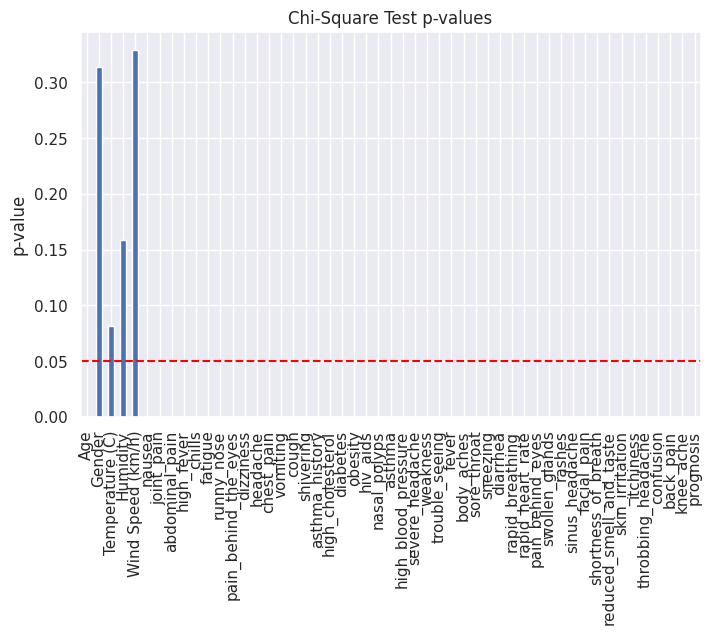

In [40]:
#  Chi-Square Feature Selection
TARGET = df.columns[-1]
X = df.drop(columns=[TARGET])
y = df[TARGET]


chi_scores = chi2(X, y)
p_values = pd.Series(chi_scores[1], index=X.columns)


plt.figure(figsize=(8,5))
p_values.plot(kind='bar')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.title("Chi-Square Test p-values")
plt.ylabel("p-value")
plt.show()

In [41]:

output_file = "weather_disease_final.csv"
df.to_csv(output_file, index=False)
print("Final processed dataset saved as:", output_file)

files.download(output_file)

Final processed dataset saved as: weather_disease_final.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>